In [99]:
import os
import numpy as np
import pandas as pd
from IPython.display import Markdown
from matplotlib import pyplot as plt
%matplotlib inline

Загрузим данные, чтобы и посмотрим, какие параметры есть в записях.

In [53]:
path = os.path.join('/', 'data', 'pik_competition', 'sev', 'data.csv')

data = pd.read_csv(path, encoding='cp1251')
data.columns = ['sick_days', 'age', 'sex']
data.head(10)

,sick_days,age,sex
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М
5,4,38,М
6,1,49,Ж
7,1,44,М
8,3,42,Ж
9,4,36,М


Заменим параметры М и Ж на 1 и 0 соответственно.

In [54]:
data['sex'] = data['sex'].apply(lambda s: 1 if s == 'М' else 0)
data.head()

,sick_days,age,sex
0,5,39,0
1,4,54,1
2,4,26,1
3,5,42,1
4,4,29,1


Посмотрим на небольшую статистику по записям.

In [4]:
data.describe()

,sick_days,age,sex
count,237.000000,237.000000,237.000000
mean,3.257384,40.181435,0.586498
std,1.807821,6.875157,0.493504
min,0.000000,23.000000,0.000000
25%,2.000000,36.000000,0.000000
50%,3.000000,41.000000,1.000000
75%,4.000000,45.000000,1.000000
max,8.000000,60.000000,1.000000


In [9]:
data.shape

(237, 3)

In [10]:
data.dropna().shape

(237, 3)

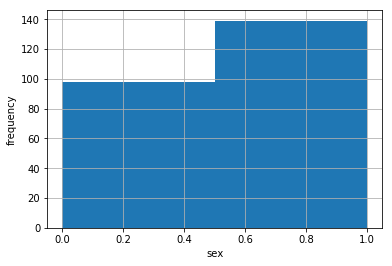

In [40]:
plt.hist(data['sex'], bins=2, align='mid')
plt.xlabel('sex')
plt.ylabel('frequency')
plt.grid()

Как видно, всего в комании работает 237 сотрудников. Из них 139 --- мужчины, 98 --- женщины. Самому младшему сотруднику 23 года, самому старшему 60 лет. Также видно, что пропусков нет, т.е. данные есть по всем сотрудникам.

Посмотрим более точно на распределние возраста по всем сотрудникам компании.

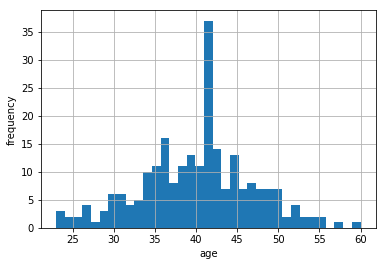

In [39]:
plt.hist(data['age'], bins=data['age'].nunique())
plt.xlabel('age')
plt.ylabel('frequency')
plt.grid()

Как видно, бОльшая часть сотрудников --- это люди в возрасте 30 до 50 лет.

Давайте посмотрим, насколько чаще мужчины пропускают в течение года более 2 рабочих дней по болезни в сравнении с женщинами.

In [113]:
female_sick_days, male_sick_days = \
    data[data['sick_days'] > 2].groupby(['sex'])['sick_days'].sum()

Text(0,0.5,'sick days')

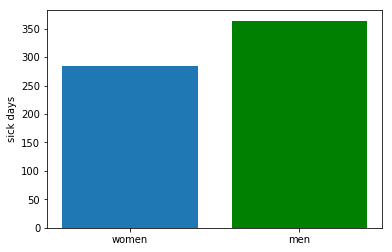

In [95]:
plt.bar(0, female_sick_days)
plt.bar(1, male_sick_days, color='green')
plt.xticks([0, 1], ['women', 'men'])
plt.ylabel('sick days')

In [114]:
male_sick_days - female_sick_days

80

In [116]:
round((male_sick_days - female_sick_days) / 365 * 100, 1)

21.9

Если посмотреть на абсолютную разницу между количеством дней, когда болели мужчины и когда болели женщины, то она составляет 80 дней. Таким образом, мужчины болеют больше женщин почти на 2.5 месяца, что составляет около 22% всех дней в году. И это, следует заметить, без учета выходных. 

Далее рассмотрим две группы работников: до 35 лет включительно и после 35. Для них проведем аналогичную процедуру и посмотрим, как много больничных дней в году они берут. 

In [101]:
old_sick_days = \
    data[(data['sick_days'] > 2) & (data['age'] > 35)]['sick_days'].sum()

young_sick_days = \
    data[(data['sick_days'] > 2) & (data['age'] <= 35)]['sick_days'].sum()

In [103]:
old_sick_days - young_sick_days

328

In [119]:
round(old_sick_days / (old_sick_days + young_sick_days) * 100, 1)

75.3

Text(0,0.5,'sick days')

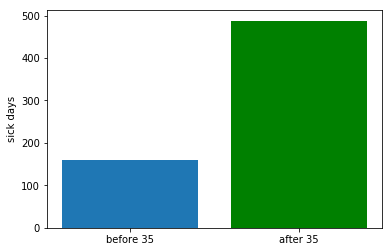

In [102]:
plt.bar(0, young_sick_days)
plt.bar(1, old_sick_days, color='green')
plt.xticks([0, 1], ['before 35', 'after 35'])
plt.ylabel('sick days')

Как можно видеть, разница коллосальная. Сотрудники старше 35 лет болеют значительно чаще и больше, чем их более молодые коллеги, что составляет около 75 от всех больничных дней.

1) Необходимо уделить внимание здоровью сотрудников и в особенности мужчин, которые более подвержены болезням, нежели женщины.

2) Нужно срочно принимать меры по улучшению здоровья сотрудников старше 35 лет